# Assignment 10: More on Choropleth, Folium Map, and Raster Data

In [1]:
!pip install mapclassify #helper package
!pip install osmnx
!pip install rioxarray

import geopandas as gpd # import geopandas
import osmnx as ox # import osmnx
import folium as fm # import folium
import rioxarray as rxr #import rioxarray

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import shapely.geometry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 58.7 MB/s eta 0:00:00


*NOTE: YOU MAY ENCOUNTER WARNING MESSGAE WHEN RUNNING THE GIVEN CODE AND SOLUTION, PLEASE INGORE IT*

## Q1. Health Network Fairness in Choropleth

### Q1a


```
# This is formatted as code
```

**Your Text Answer** Amenity= Hospital, Amenity= clinic, Amenity= Pharmacy. Emergency	= ambulance_station, emergency= emergency_ward_entrance, healthcare=hospital,healthcare=blood_bank

### Q1b

In [2]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
toronto_hospital = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/toronto_hospital.csv')
toronto_hospital.head()

name  \
0    Scarborough Health Network - Centenary Hospital   
1  Centre For Addiction and Mental Health - Queen...   
2  Sunnybrook Health Sciences Centre - Bayview Ca...   
3                           Toronto Western Hospital   
4                         St. Joseph's Health Centre   

                                        geometry proerpty_type  
0  POINT (-79.20480950712249 43.780254515806355)      hospital  
1  POINT (-79.41863658506462 43.642999439390984)      hospital  
2  POINT (-79.37479438480257 43.722703238572585)      hospital  
3   POINT (-79.40548222230937 43.65350652564968)      hospital  
4    POINT (-79.45005775014081 43.6402993282079)      hospital

In [3]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
!wget https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip




--2024-03-31 22:49:52--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662579 (15M) [application/x-zip-compressed]
Saving to: ‘lfsa000a16a_e.zip’

lfsa000a16a_e.zip   100%[===================>]  14.94M  1.39MB/s    in 11s     

2024-03-31 22:50:04 (1.31 MB/s) - ‘lfsa000a16a_e.zip’ saved [15662579/15662579]



In [4]:
!unzip lfsa000a16a_e.zip -d lfsa000a16a_e


Archive:  lfsa000a16a_e.zip
  inflating: lfsa000a16a_e/lfsa000a16a_e.dbf  
  inflating: lfsa000a16a_e/lfsa000a16a_e.prj  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shp  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shx  
  inflating: lfsa000a16a_e/forward_sortation_area.html  
  inflating: lfsa000a16a_e/92-179-g2016001-eng.pdf  


In [5]:
toronto_FSA = gpd.read_file('lfsa000a16a_e')
# 'CFSAUID' start with m
toronto_FSA = toronto_FSA[toronto_FSA['CFSAUID'].str.startswith('M')]
toronto_FSA = toronto_FSA[['CFSAUID', 'geometry']]
toronto_FSA['proerpty_type'] = 'FSA'
toronto_FSA.columns = ['name', 'geometry', 'proerpty_type']
toronto_FSA.head()

name                                           geometry proerpty_type
637  M9R  POLYGON ((7209908.140 928259.897, 7209816.766 ...           FSA
638  M9V  POLYGON ((7206682.694 937743.451, 7206631.563 ...           FSA
639  M9W  POLYGON ((7210531.760 934710.503, 7210542.117 ...           FSA
701  M1P  POLYGON ((7233594.731 942118.174, 7233584.157 ...           FSA
702  M1R  MULTIPOLYGON (((7231166.760 939882.914, 723135...           FSA

In [6]:
### Your code here ###
warnings.filterwarnings('ignore')
place = 'City of Toronto, ontario, canada'
tag = {'amenity': ['hospital', 'clinic']}
toronto_hospital = ox.features_from_place(place, tags=tag)
toronto_hospital = toronto_hospital[toronto_hospital['emergency'] == 'yes'][['name', 'geometry']].reset_index(drop=True)
toronto_hospital['proerpty_type'] = 'hospital'
toronto_hospital['geometry'] = toronto_hospital['geometry'].apply(lambda x: x.centroid)
toronto_hospital.head()

name  \
0    Scarborough Health Network - Centenary Hospital   
1  Centre For Addiction and Mental Health - Queen...   
2  Sunnybrook Health Sciences Centre - Bayview Ca...   
3                           Toronto Western Hospital   
4                         St. Joseph's Health Centre   

                     geometry proerpty_type  
0  POINT (-79.20481 43.78025)      hospital  
1  POINT (-79.41864 43.64300)      hospital  
2  POINT (-79.37479 43.72270)      hospital  
3  POINT (-79.40548 43.65351)      hospital  
4  POINT (-79.45006 43.64030)      hospital

In [7]:
toronto_FSA.crs


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
#toronto_FSA = toronto_FSA.to_crs(epsg=4326)

#concatenate the data
toronto_FSA.to_crs(epsg=4326, inplace=True)

gdf_all = pd.concat([ toronto_hospital, toronto_FSA  ], axis=0, ignore_index=True)
gdf_all.head()

name  \
0    Scarborough Health Network - Centenary Hospital   
1  Centre For Addiction and Mental Health - Queen...   
2  Sunnybrook Health Sciences Centre - Bayview Ca...   
3                           Toronto Western Hospital   
4                         St. Joseph's Health Centre   

                     geometry proerpty_type  
0  POINT (-79.20481 43.78025)      hospital  
1  POINT (-79.41864 43.64300)      hospital  
2  POINT (-79.37479 43.72270)      hospital  
3  POINT (-79.40548 43.65351)      hospital  
4  POINT (-79.45006 43.64030)      hospital

### Q1c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

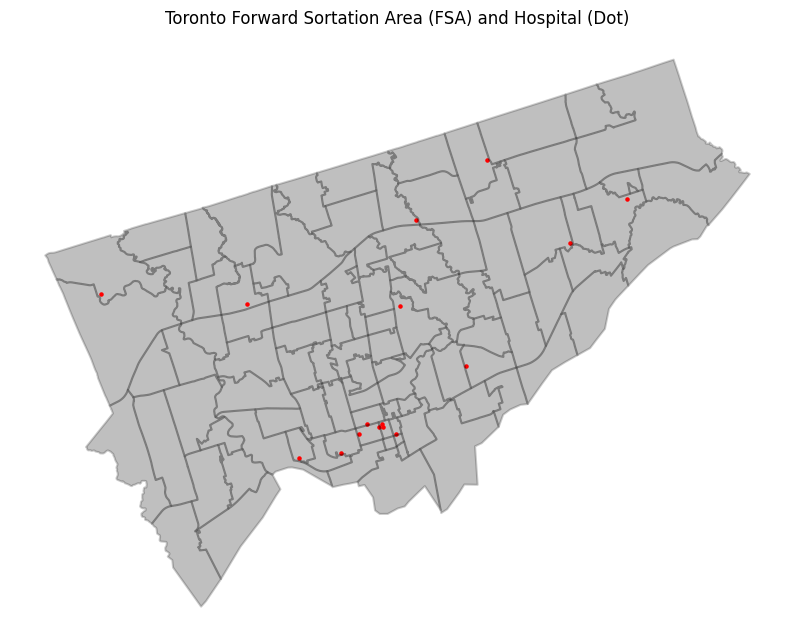

In [9]:
### Your code here ###
#diplay the choropleth
gdf_all[gdf_all['proerpty_type'] == 'FSA'].plot(figsize=(10, 10), legend=True, color = 'grey',alpha=0.5)
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(figsize=(10, 10), legend=True,
                                                           color='red', ax=plt.gca(),alpha=1, markersize=5)
# boundary of the shapefile
gdf_all[gdf_all['proerpty_type'] == 'FSA'].boundary.plot(figsize=(10, 10), color = 'black', ax=plt.gca(),alpha=0.2)

plt.title('Toronto Forward Sortation Area (FSA) and Hospital (Dot)')
plt.axis('off')
plt.show()

**Your Text Answer**There is a clear indication that most hospitals are located at the bottom middle region in the southern area, and the rest are spread all over as move North

### Q1d

In [10]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###
def get_centroid(geom):
    if geom.geom_type == 'Polygon' or geom.geom_type == 'MultiPolygon':
        return geom.centroid
    else:
        return geom

##your code end here ###

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###
gdf_all_with_centroid = gdf_all.copy()
gdf_all_with_centroid['centroid'] = gdf_all_with_centroid['geometry'].apply(get_centroid)
gdf_all_with_centroid.head()
##your code end here ###

name  \
0    Scarborough Health Network - Centenary Hospital   
1  Centre For Addiction and Mental Health - Queen...   
2  Sunnybrook Health Sciences Centre - Bayview Ca...   
3                           Toronto Western Hospital   
4                         St. Joseph's Health Centre   

                     geometry proerpty_type                    centroid  
0  POINT (-79.20481 43.78025)      hospital  POINT (-79.20481 43.78025)  
1  POINT (-79.41864 43.64300)      hospital  POINT (-79.41864 43.64300)  
2  POINT (-79.37479 43.72270)      hospital  POINT (-79.37479 43.72270)  
3  POINT (-79.40548 43.65351)      hospital  POINT (-79.40548 43.65351)  
4  POINT (-79.45006 43.64030)      hospital  POINT (-79.45006 43.64030)

In [12]:
# calculate the distance matrix between each FSA centriod and hospital
## Your code here ###


fsa_centroid = gdf_all_with_centroid[gdf_all_with_centroid['proerpty_type'] == 'FSA'][['name', 'centroid']]
hospital_station_centroid = gdf_all_with_centroid[gdf_all_with_centroid['proerpty_type'] == 'hospital'][['name', 'centroid']]
# calculate the distance between each FSA and hospital

def get_distance_matrix(fsa_centroid, hospital_station_centroid) -> pd.DataFrame:
    '''
    this function is used to calculate the distance matrix between each FSA and hospital

    fsa_centroid: dataframe with the centroid of FSA
    hospital_station_centroid: dataframe with  the centroid of hospital

    return: a dataframe with the distance between each FSA and hospital
    '''
    distance_matrix = np.zeros((fsa_centroid.shape[0], hospital_station_centroid.shape[0]))
    for i in range(fsa_centroid.shape[0]):
        for j in range(hospital_station_centroid.shape[0]):
            distance_matrix[i, j] = fsa_centroid.iloc[i]['centroid'].distance(hospital_station_centroid.iloc[j]['centroid'])
    distance_matrix = pd.DataFrame(distance_matrix, index=fsa_centroid['name'].to_list(), columns=hospital_station_centroid['name'])
    return distance_matrix

distance_matrix = get_distance_matrix(fsa_centroid, hospital_station_centroid)
distance_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  Scarborough Health Network - Centenary Hospital  \
M9R                                          0.365086   
M9V                                          0.391324   
M9W                                          0.385836   
M1P                                          0.067660   
M1R                                          0.097361   
..                                                ...   
M6M                                          0.293495   
M6N                                          0.298467   
M6P                                          0.285114   
M5P                                          0.223942   
M5R                                          0.225023   

name  Centre For Addiction and Mental Health - Queen Street Site  \
M9R                                            0.146369            
M9V                                            0.202029            
M9W                                            0.178507            
M1P                                            0.190490            
M1R                                            0.161511            
..                                                  ...            
M6M                                            0.083878            
M6N                                            0.072537            
M6P                                            0.048019            
M5P                                            0.053771            
M5R                                            0.034798            

name  Sunnybrook Health Sciences Centre - Bayview Campus  \
M9R                                            0.186494    
M9V                                            0.220449    
M9W                                            0.209764    
M1P                                            0.111969    
M1R                                            0.082105    
..                                                  ...    
M6M                                            0.114210    
M6N                                            0.119286    
M6P                                            0.108432    
M5P                                            0.045937    
M5R                                            0.056228    

name  Toronto Western Hospital  St. Joseph's Health Centre  \
M9R                   0.156309                    0.117911   
M9V                   0.208868                    0.176941   
M9W                   0.187347                    0.151057   
M1P                   0.173655                    0.217406   
M1R                   0.144695                    0.187853   
..                         ...                         ...   
M6M                   0.089463                    0.064147   
M6N                   0.081238                    0.048196   
M6P                   0.058355                    0.024037   
M5P                   0.043473                    0.067544   
M5R                   0.020840                    0.057780   

name  Michael Garron Hospital  Etobicoke General Hospital  \
M9R                  0.233066                    0.057618   
M9V                  0.274522                    0.013983   
M9W                  0.259992                    0.023838   
M1P                  0.090713                    0.329641   
M1R                  0.065660                    0.301504   
..                        ...                         ...   
M6M                  0.160427                    0.118097   
M6N                  0.159750                    0.126477   
M6P                  0.141657                    0.151200   
M5P                  0.087772                    0.188410   
M5R                  0.079918                    0.202326   

name  Humber River Hospital  Scarborough Health Network - General Campus  \
M9R                0.078006                                     0.317728   
M9V                0.107479                                     0.346817   
M9W                0.096522                                     0.33960

### Q1e

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


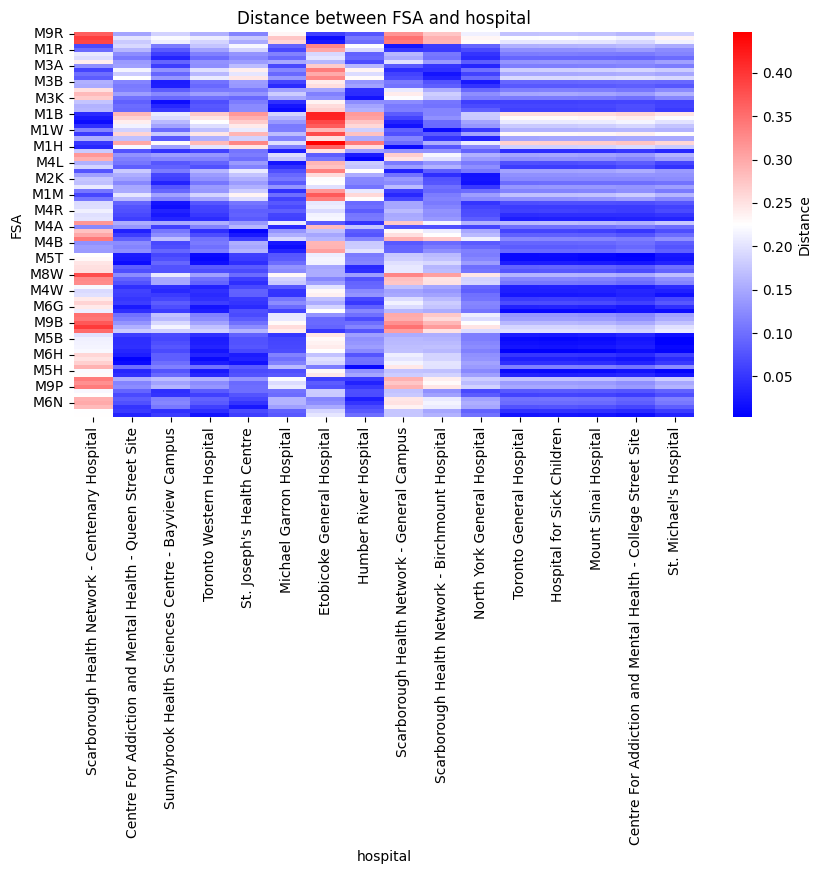

In [13]:
warnings.filterwarnings('ignore')
import seaborn as sns
### you code here##
#plot the heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(distance_matrix, cmap='bwr', cbar_kws={'label': 'Distance'})
plt.title('Distance between FSA and hospital')
plt.xlabel('hospital')
plt.ylabel('FSA')
plt.show()

**Your Text Answer** There are some notable for patterns in the distances.  there are some clusters of locations with significantly shorter or longer distances to the hospital compared to others, this may indicate an imbalance. For example, for M6N most hospitals are in close distances (shown from dark blue colours)(Toronto Gen to st Michaels) and for M1B we can see some imbalance in the distances.

## Q2: Visualizing Health Network Fairness


### Q2a

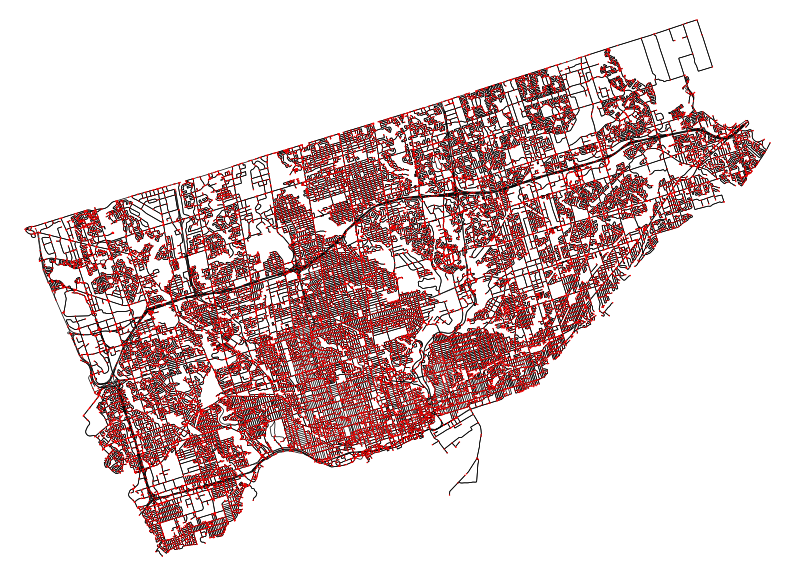

In [14]:
## you code here ##
place ="City of Toronto, Ontario, Canada" #place for extraction Case Sensitive
street_map = ox.graph.graph_from_place(place, network_type='drive') # extract the data, only extract the drivable network

#plot
ox.plot_graph(street_map, figsize=(10, 10), bgcolor='w',node_size=1, node_alpha=1,node_color='r',
              edge_linewidth=0.5, edge_color='k') #show edge only, change node_alpha to 0
plt.show()

# the solution might take > 1 min to run

In [15]:
print('Number of nodes:', street_map.number_of_nodes()) # print the number of nodes
print('Number of edges:', street_map.number_of_edges()) # print the number of edges

Number of nodes: 27352
Number of edges: 72978


**your text answer** Number of nodes: 27353
Number of edges: 72979

### Q2b

In [16]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
distance_matrix_by_shortest_path = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/distance_matrix_by_shortest_path.csv', index_col=0)
# create a new pandas series to store the nearest distance
smallest_distance_by_shortest_path = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance_by_shortest_path.name = 'nearest_hospital'

# obtain all row that is a foward sortation area
toronto_FSA.to_crs(epsg=4326, inplace=True)
toronto_FSA['centroid'] = toronto_FSA['geometry'].apply(lambda x: x.centroid)
# merge the distance series with the FSA shape data
gdf_smallest_distance_by_shortest_path = toronto_FSA.merge(smallest_distance_by_shortest_path, left_on='name', right_index=True).rename(columns={0: 'nearest_hospital'})
gdf_smallest_distance_by_shortest_path.head()
# your output should be exactly the same as the expected output, if not, re-run given code in Q1

name                                           geometry proerpty_type  \
637  M9R  POLYGON ((-79.56131 43.67478, -79.56249 43.674...           FSA   
638  M9V  POLYGON ((-79.57759 43.76205, -79.57829 43.761...           FSA   
639  M9W  POLYGON ((-79.53885 43.72937, -79.53884 43.728...           FSA   
701  M1P  POLYGON ((-79.24704 43.75374, -79.24720 43.753...           FSA   
702  M1R  MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...           FSA   

                       centroid  nearest_hospital  
637  POINT (-79.55799 43.68778)          6973.215  
638  POINT (-79.59433 43.74274)          1854.019  
639  POINT (-79.58416 43.70983)          2981.682  
701  POINT (-79.27000 43.76213)          2710.604  
702  POINT (-79.29717 43.74945)          4471.884

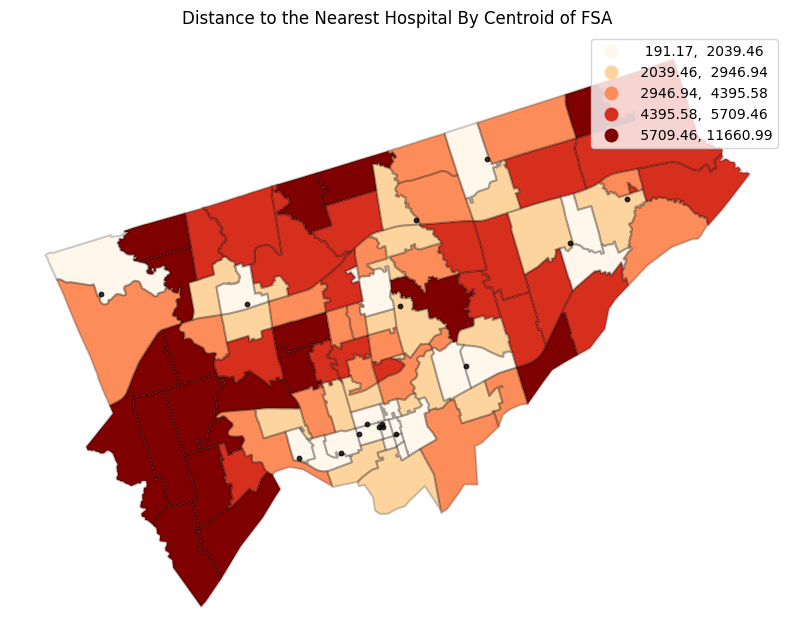

In [17]:
gdf_smallest_distance_by_shortest_path.plot(column='nearest_hospital', legend=True, scheme='quantiles',
              cmap='OrRd', figsize=(10, 10))
gdf_smallest_distance_by_shortest_path.boundary.plot(figsize=(10, 10), color = 'black', ax=plt.gca(),alpha=0.2)
# add hospital
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(ax=plt.gca(), color='black', alpha=0.8, markersize=10)
plt.title('Distance to the Nearest Hospital By Centroid of FSA')
plt.axis('off')
plt.show()


**your text answer** Darker regions show great distance to nearest hospital and seem to be located in the bottom far left regions , whereas all hospitals located downtown show consistence in lower distances/paths. The rest of the hospital distances show various distances but nothing greater 2946.94
---



### Q2c

In [18]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
census_data = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/2016_census.csv').iloc[:, 1:]
census_data.columns = ['name', 'median_income', 'population','visual_minority']
census_data['prec_visual_minority'] = census_data['visual_minority'] / census_data['population']
census_data = toronto_FSA.merge(census_data, on='name')
census_data = census_data[['name','prec_visual_minority','centroid']]
census_data.head()

# your output should be exactly the same as the expected output, if not, re-run given code in Q1

name  prec_visual_minority                    centroid
0  M9R              0.544557  POINT (-79.55799 43.68778)
1  M9V              0.814882  POINT (-79.59433 43.74274)
2  M9W              0.689214  POINT (-79.58416 43.70983)
3  M1P              0.737640  POINT (-79.27000 43.76213)
4  M1R              0.564003  POINT (-79.29717 43.74945)

In [19]:
# empty folium map
nearest_hospital_map = fm.Map(location=[43.7, -79.4], zoom_start=12,
                                  scrollWheelZoom=False, tiles=None,
                                    control_scale=True)
# geo-json file with vector shape of FSA
FSA_json = gdf_smallest_distance_by_shortest_path[['name', 'geometry']].to_json()

## you code here ##
fm.TileLayer('openstreetmap').add_to(nearest_hospital_map)

##set quantiles
quantile = gdf_smallest_distance_by_shortest_path['nearest_hospital'].quantile([0, 0.25, 0.5, 0.75, 1]).to_list()


In [20]:
fm.Choropleth( # create a choropleth layer
    geo_data=FSA_json, # feed in the json data for vector shape
    name='Distance to the Nearest Hospital', # name of the layer
    data=gdf_smallest_distance_by_shortest_path, # feed in the dataframe for feature properties
    columns=['name', 'nearest_hospital'], # columns to use from the dataframe
    key_on='feature.properties.name', # key to match the json data and dataframe
    fill_color='OrRd', # color for the choropleth
    fill_opacity=0.4, # opacity of the fill color
    line_opacity=0.2, # opacity of the boundary line
    bins = quantile, # bins to classify the data
    legend_name='Distance to the Nearest Subway Station' # name of the legend
).add_to(nearest_hospital_map) # add the layer to the map
nearest_hospital_map # display the map

In [21]:

median_income = fm.FeatureGroup(name="prec_visual_minority", control=True).add_to(nearest_hospital_map)

for index, row in census_data.iterrows():
    centroid = [row['centroid'].y, row['centroid'].x]
    fm.CircleMarker(centroid, radius=row['prec_visual_minority']*20, color='blue',
     fill=True, fill_color='blue').add_to(median_income)

nearest_hospital_map


In [22]:
fm.TileLayer('cartodb dark_matter',show=False).add_to(nearest_hospital_map) # add the dark matter tile layer, show=False means the layer is not shown by default
fm.TileLayer('cartodb positron',show=False).add_to(nearest_hospital_map) # add the positron tile layer

fm.LayerControl().add_to(nearest_hospital_map) # add the layer control
nearest_hospital_map

### Q2d
**your text answer** I distinguish a relationship between percentage of high visual minos and the shortest dirving distance to the nearest hopsital. For example downtown toronto, seems to have shortest driving distances between hospitals but has lower percentage of visual minority for some hospitals.


## Q3: Raster Data (OPTIONAL: THIS QUESTION DOES NOT COUNT TOWARDS THE TOTAL GRADE)

In [23]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
url = 'https://www.arcgis.com/sharing/rest/content/items/4b1863b58f9a4aa98f3eb4e95299cff2/data'
raster_data = rxr.open_rasterio(url,masked=True).squeeze() # open the raster data

### Q3a

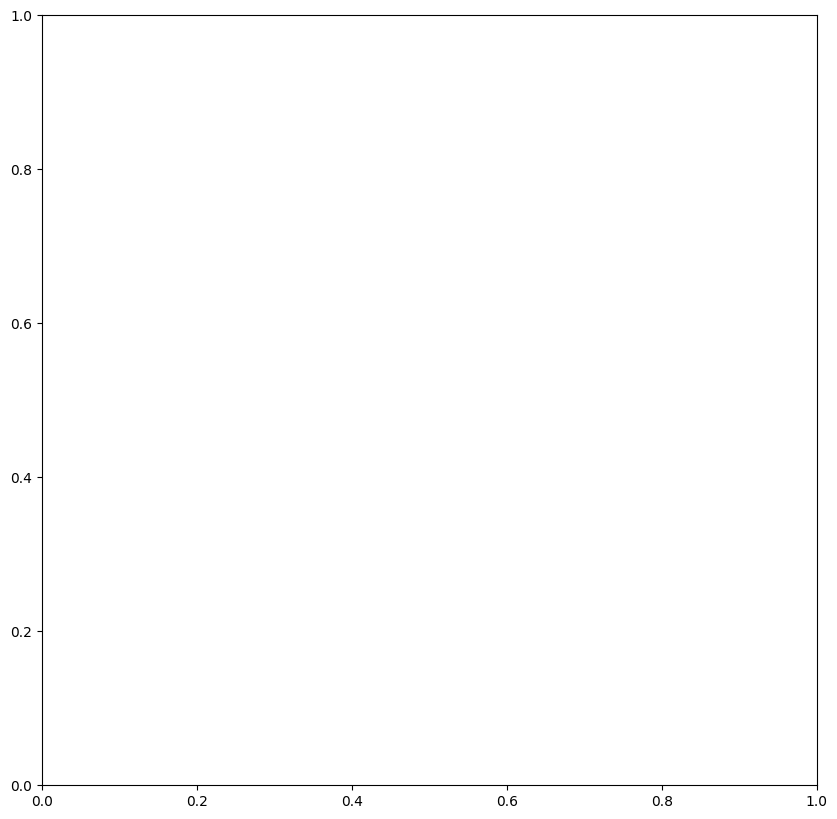

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
## your code here ##
# plot the raster_data
# you might encounter following error when plotting  'ERROR 1: Line 22: </table> doesn't have matching <table>'
# please let the code run, it will generate the plot.

In [25]:
# what is the shape, the CRS?


**your text answer**

### Q3b

In [26]:
import xarray as xr
## your code here ##


**you text answer**

### Q3c
**you text answer**